# Assignment 15.2: Building and Evaluating Decision Tree and Random Forest Regression Models - Section A

Business Case: Develop regression models to forecast car prices based on various characteristics provided. 

## Import Libraries/Dataset

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_excel("data/IIMK_DSAI_W15_Graded Assignment 15.2_Data Set.xlsm")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [55]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [56]:
df.shape

(205, 26)

In [57]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [58]:
#drop car id and car name as we have to do prediction on the bases of characteristics. 
df = df.drop(['car_ID', 'CarName'], axis='columns')
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [59]:
def print_unique_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [60]:
print_unique_values(df)

fueltype : ['gas' 'diesel']
aspiration : ['std' 'turbo']
doornumber : ['two' 'four']
carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel : ['rwd' 'fwd' '4wd']
enginelocation : ['front' 'rear']
enginetype : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [61]:
#convert to numeric values
df = pd.get_dummies(data=df, columns=['fueltype','aspiration','doornumber','carbody', 'drivewheel','enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'], dtype=int)

In [62]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


## Data Visualization and Augmentation

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>,
        <Axes: title={'center': 'carwidth'}>,
        <Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginesize'}>],
       [<Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'peakrpm'}>,
        <Axes: title={'center': 'citympg'}>,
        <Axes: title={'center': 'highwaympg'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'fueltype_diesel'}>,
        <Axes: title={'center': 'fueltype_gas'}>,
        <Axes: title={'center': 'aspiration_std'}>,
        <Axes: title={'center': 'aspiration_turbo'}>,
        <Axes: title={'center': 'doornumber_four'}>,
        <Axes: title={'center': 

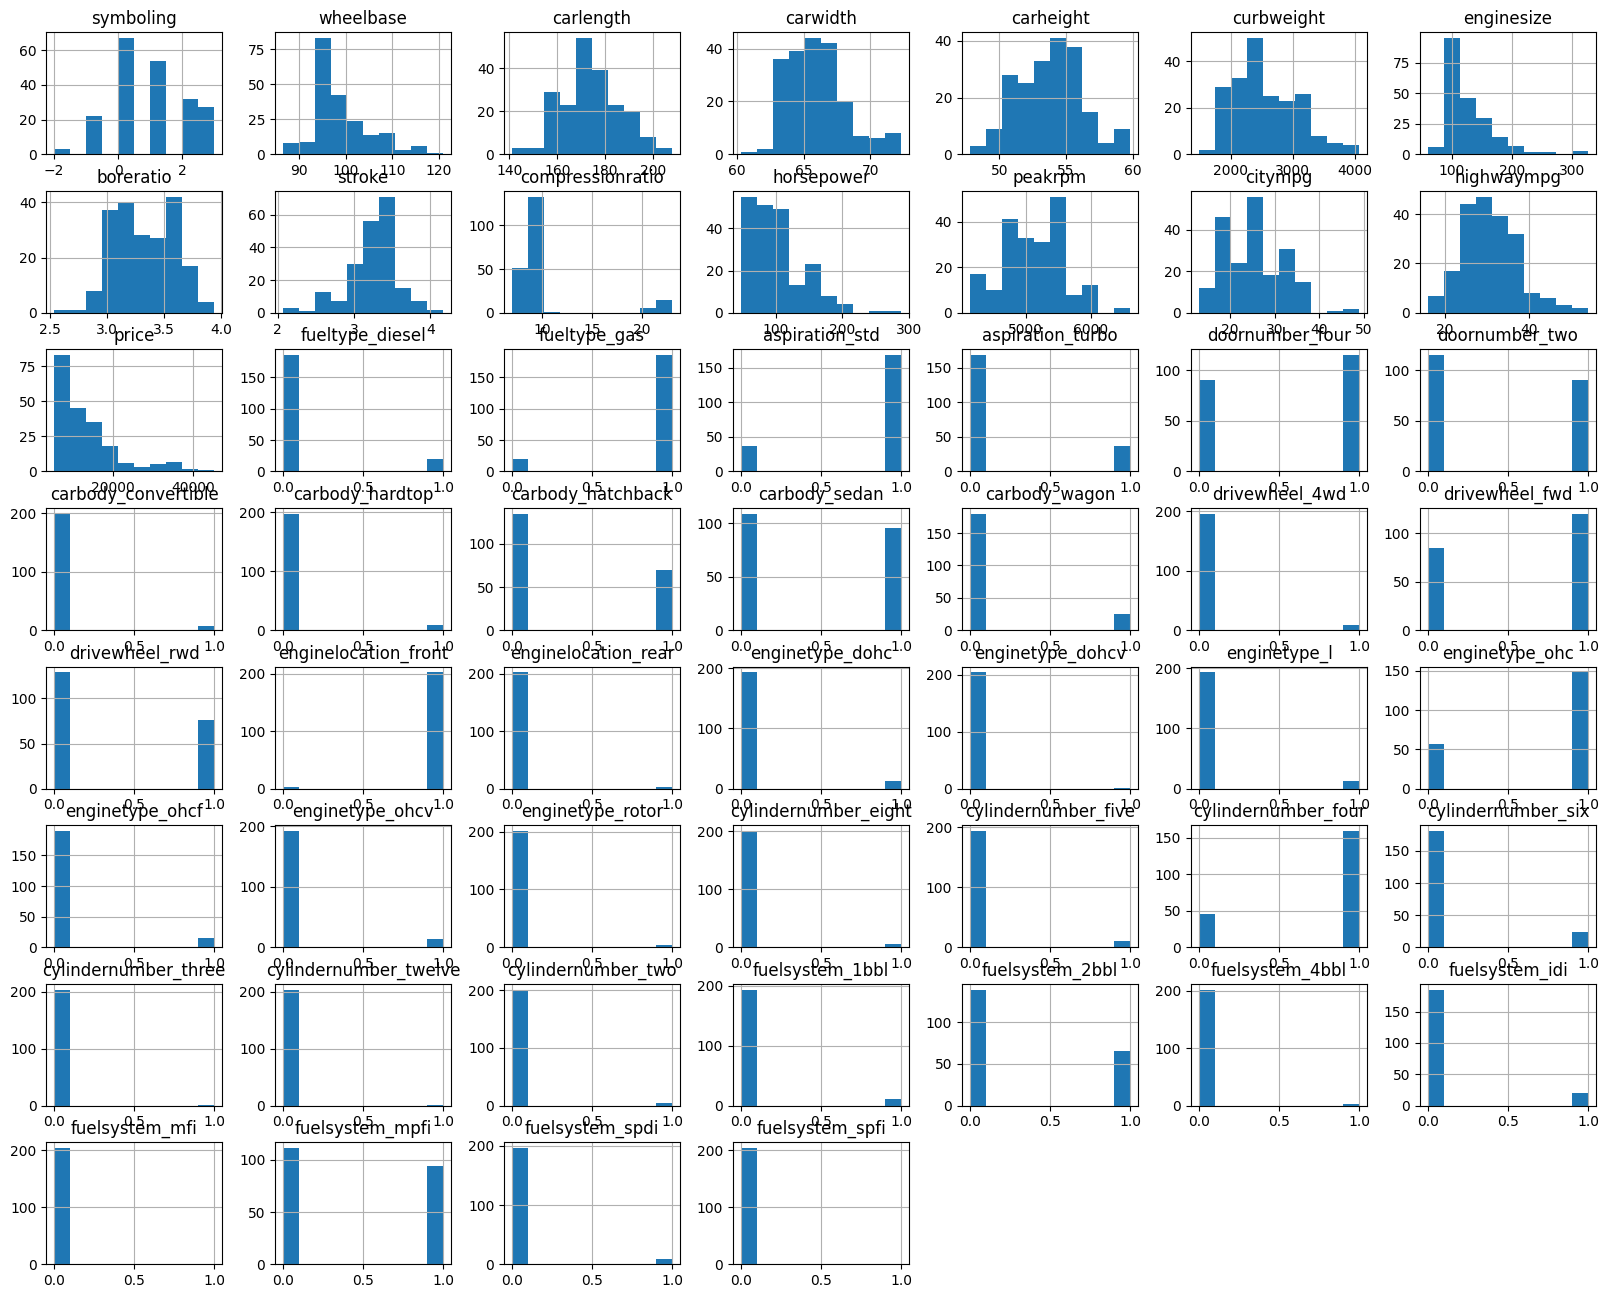

In [63]:
df.hist(figsize=(20,16))

Data appears to be normally distributed for most variables

<Axes: xlabel='price', ylabel='enginesize'>

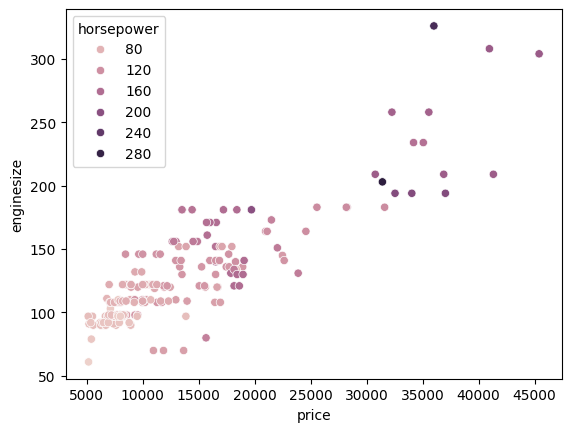

In [64]:
sn.scatterplot(x = 'price', y = 'enginesize', data = df, hue='horsepower')

<Axes: xlabel='price', ylabel='curbweight'>

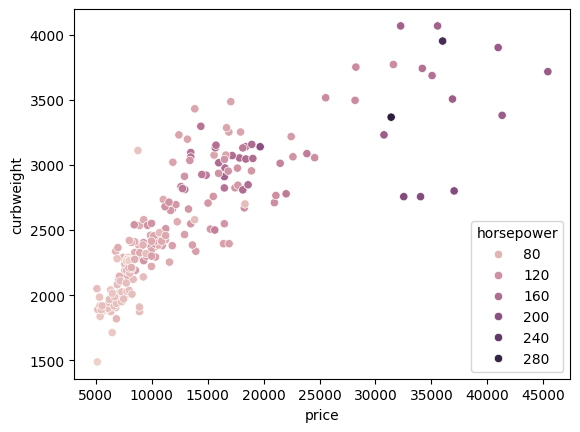

In [65]:
sn.scatterplot(x = 'price', y = 'curbweight', data = df, hue='horsepower')

<Axes: >

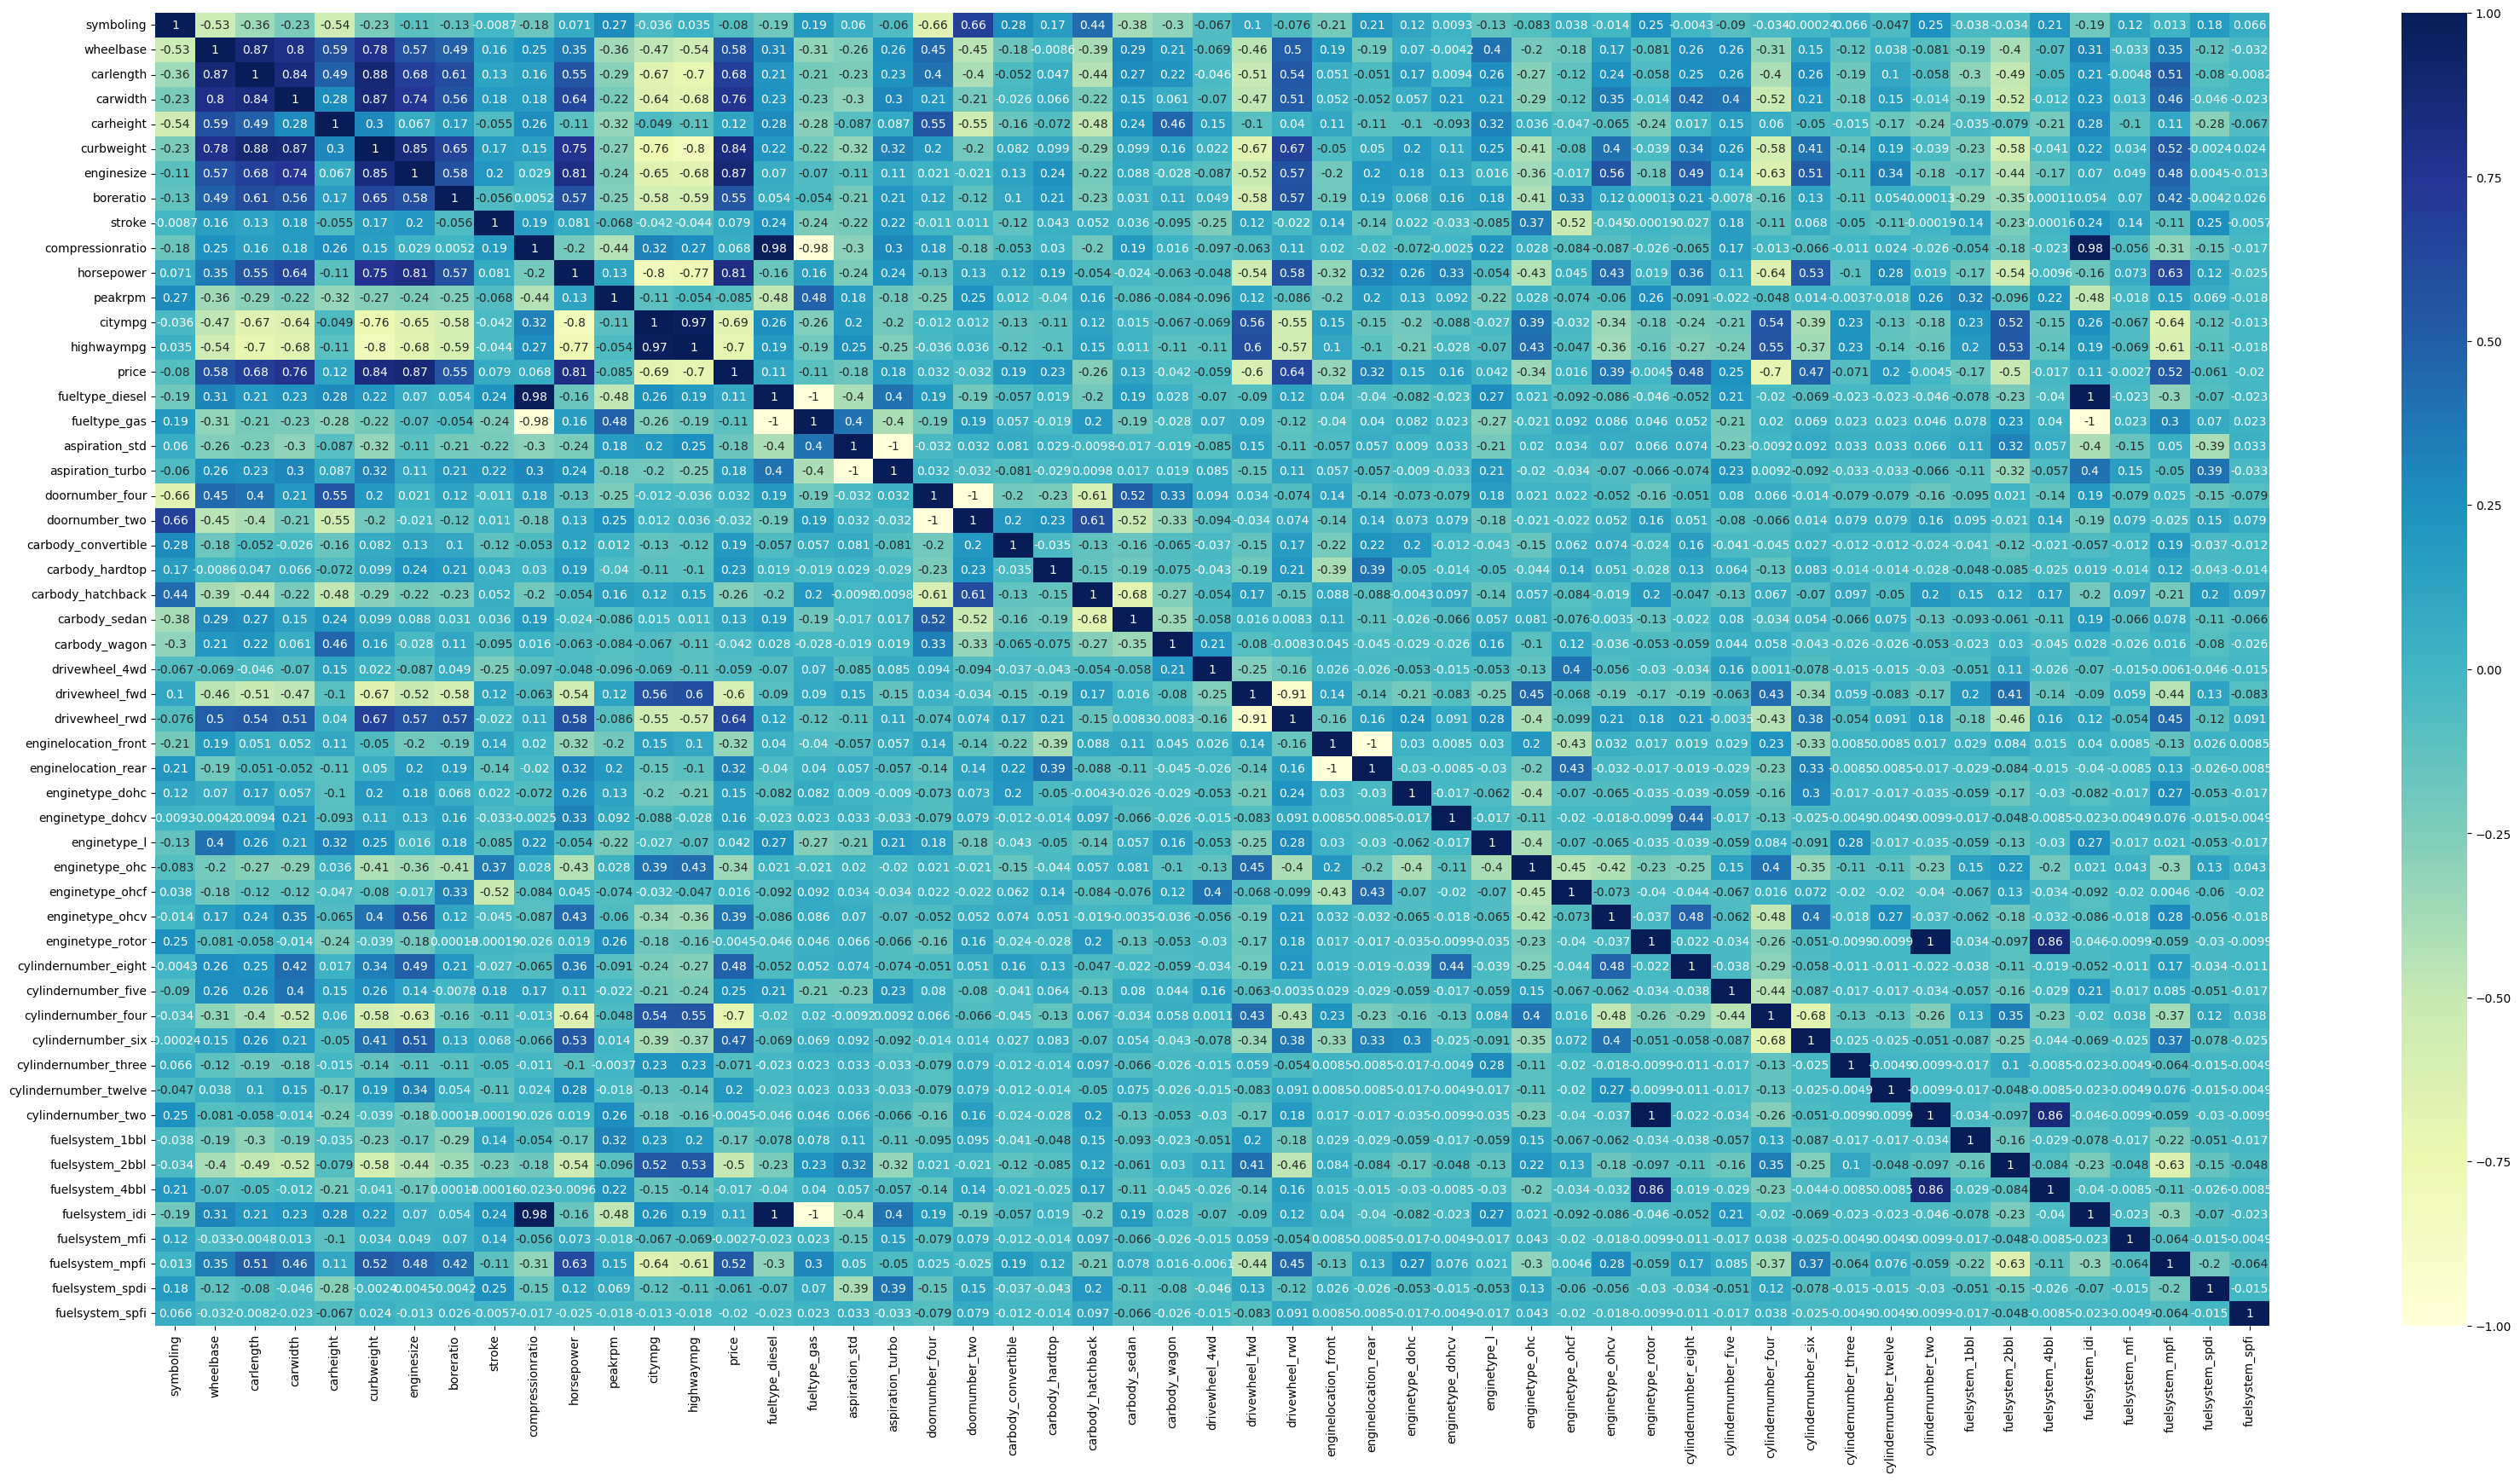

In [66]:
plt.figure(figsize=(40,20))
sn.heatmap(df.corr(), annot=True, cmap='YlGnBu')

Weel base, Car height, Car width, Engine size, Boreratio, Horsepoer has positive correlation with price.

In [67]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis='columns')
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Decision Tree Regression Model Construction

In [69]:
dtree_model = DecisionTreeRegressor()
dtree_model.fit(X_train_scaled, y_train)
score = dtree_model.score(X_test_scaled, y_test)
score

0.8415781720279785

<Axes: xlabel='importance', ylabel='feature'>

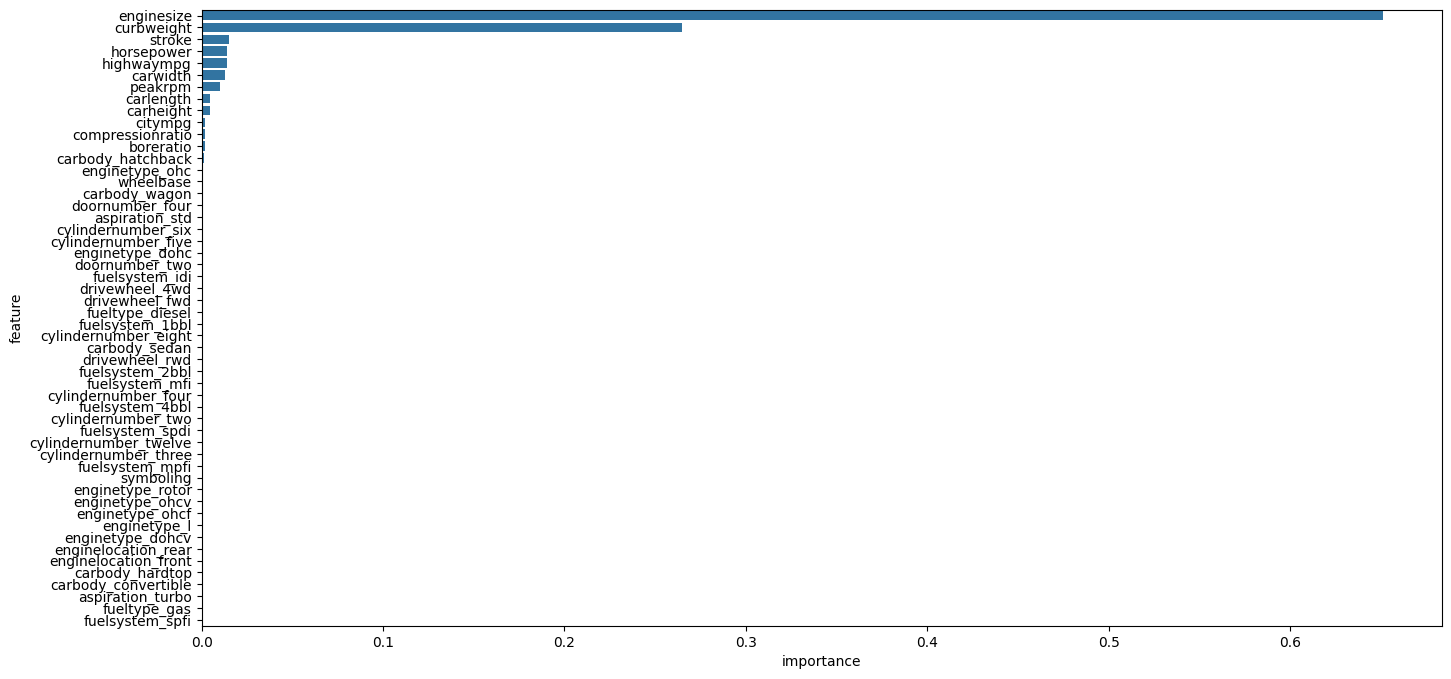

In [70]:
feature_rank = pd.DataFrame({'feature': X_train.columns, 'importance': dtree_model.feature_importances_ })
feature_rank = feature_rank.sort_values('importance', ascending=False)

plt.figure(figsize=(16,8))
sn.barplot(y='feature', x='importance', data=feature_rank)

## Random Forest Regression Model Construction

In [71]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
score = rf_model.score(X_test_scaled, y_test)
score

0.8950744407647734

<Axes: xlabel='importance', ylabel='feature'>

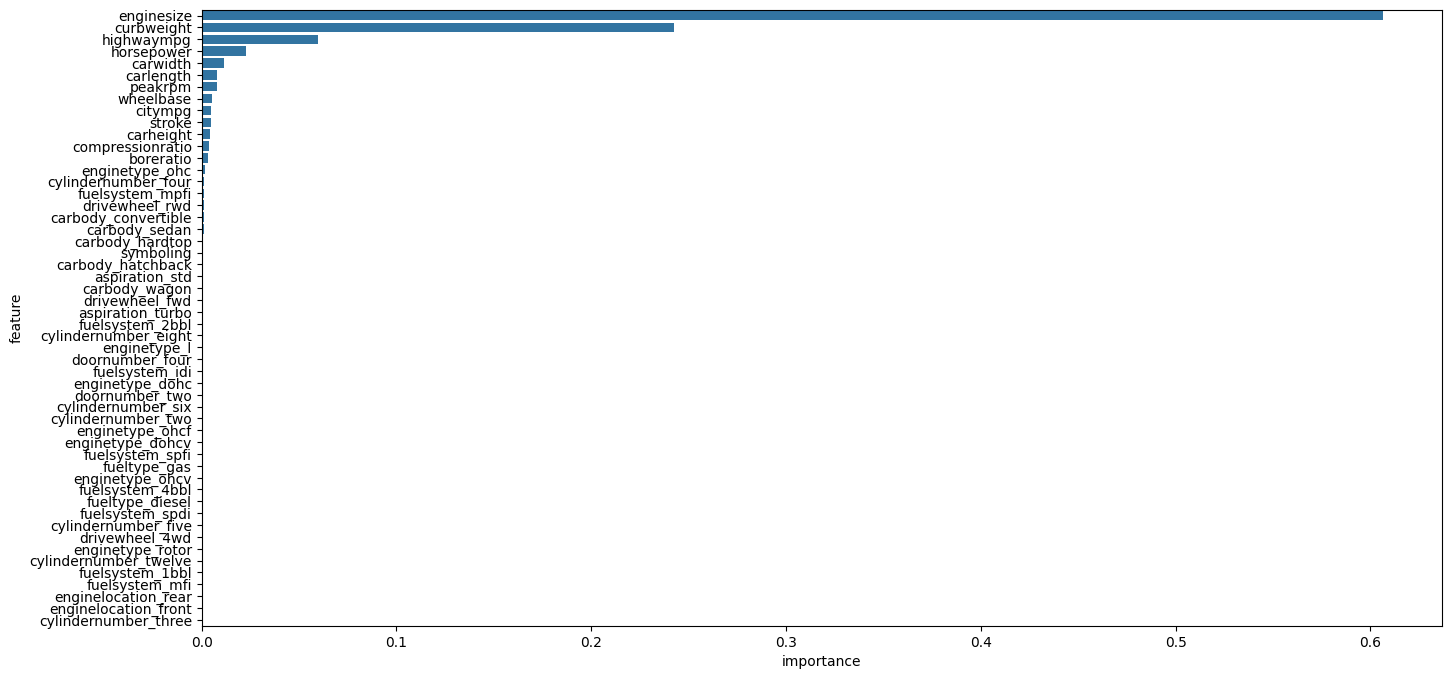

In [72]:
feature_rank = pd.DataFrame({'feature': X_train.columns, 'importance': rf_model.feature_importances_ })
feature_rank = feature_rank.sort_values('importance', ascending=False)

plt.figure(figsize=(16,8))
sn.barplot(y='feature', x='importance', data=feature_rank)

Features Engine Size, Curb Weight, Highway mpg, Horsepower contributing most towards price prediction

## Model Evaluation

In [73]:
def print_stats(model, X_testdata, y_test_results):
    y_pred = model.predict(X_testdata)
    print('mae=',mean_absolute_error(y_test_results,y_pred))
    print('mse=',mean_squared_error(y_test_results,y_pred))
    print('rmse=',root_mean_squared_error(y_test_results,y_pred))
    print('r2 score=',r2_score(y_test_results,y_pred))
    

In [76]:
print('Decision Tree Regressor')
print('Training Score')
print_stats(dtree_model, X_train_scaled, y_train)
print('Test Score')
print_stats(dtree_model, X_test_scaled, y_test)

Decision Tree Regressor
Training Score
mae= 64.66463414634147
mse= 80289.71036585367
rmse= 283.3543900592572
r2 score= 0.9986537119069865
Test Score
mae= 2304.4959268292682
mse= 12506456.095216805
rmse= 3536.4468178125917
r2 score= 0.8415781720279785


In [77]:
print('Random Forest Regressor')
print('Training Score')
print_stats(rf_model, X_train_scaled, y_train)
print('Test Score')
print_stats(rf_model, X_test_scaled, y_test)

Random Forest Regressor
Training Score
mae= 586.542855691057
mse= 852289.2910066876
rmse= 923.1951532621299
r2 score= 0.9857089168829135
Test Score
mae= 1964.9023292682928
mse= 8283245.539075486
rmse= 2878.0628101338384
r2 score= 0.8950744407647734


RandomForestRegressor is performing better than DecisionTreeRegressor because it has lower MAE on test data than DecisionTreeRegressor and also RandomForestRegressor R2 score is better than DecisionTreeRegressor for the given problem. DecisionTreeRegressor is overfitting on the training data becasue there is big difference in the MAE, MSE, RMSE and R2 score of training and test data. 

## Performance

Random forest predictions are more accurate than the decision trees on the test data on the other hand decision tree seems to overfit the training data. Overfitting is the critical issue in machine learning, when we use algorithms then there is a risk of overfitting which can be considered as a general bottleneck in machine learning. 
The decision tree has more possibility of overfitting whereas random forest reduces the risk of it because it uses multiple decision trees. When we using a decision tree model on a given dataset the accuracy going improving because it has more splits so that we can easily overfit the data and validates it.